Importing packages

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

Loading data

In [77]:
file_path = "data/seeds_dataset_ver2.txt"
df = pd.read_table(file_path, delimiter="\t", names=('area', 'perimeter', 'compactness','length_kernel','width_kernel', 'asymmetry_coefficient','length_kernel_groove','wheat_varieties'))
df

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove,wheat_varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Moving the 'wheat_varities' column into a separate variable.

In [78]:
#original data
x = df.drop('wheat_varieties', axis = 1)
y = df['wheat_varieties']

Here is a function to easier replicate the testing and saves all the necessary data.

In [105]:
accuracy = []
confusion = []
y_test_list = []
predictions_list =  []
model_list = []

def task(x_data, y_data, test_value, train_value):
    accuracy.clear()
    confusion.clear()
    y_test_list .clear()
    predictions_list.clear()
    model_list .clear()
    n = 1
    score = 0
    while n <= 100:
        x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = test_value ,train_size=train_value)
        model = DecisionTreeClassifier(random_state=None)
        fit_model = model.fit(x_training_data, y_training_data)
        model_list.append(fit_model)
        predictions = model.predict(x_test_data)
        predictions_list.append(predictions)
        score+=accuracy_score(y_test_data, predictions)
        accuracy.append(accuracy_score(y_test_data,predictions))
        confusion.append(confusion_matrix(y_test_data, predictions))
        y_test_list.append(y_test_data)
        n = n+1
    #calculate mean
    mean_score = score/100
    print(f'Mean of 100 tests: {mean_score}')

Original data.

Train = 75%

Test = 25%

Performs the task and prints out the first 5 accuracies and the first 5 confusion matrices just to save space. We do have all 100 accuracies and matrices saved. Also prints the means of the accuracies over the 100 tests.

In [80]:

task(x_data = x, y_data = y, test_value = 0.25, train_value = 0.75)
print(f'First 5 accuracies: {accuracy[:5]}')
print(f'First 5 confusion matrices: {confusion[:5]}')


Mean of 100 tests: 0.9052830188679245
First 5 accuracies: [0.9622641509433962, 0.8867924528301887, 0.8867924528301887, 0.9245283018867925, 0.9056603773584906]
First 5 confusion matrices: [array([[15,  0,  0],
       [ 1, 17,  0],
       [ 1,  0, 19]], dtype=int64), array([[13,  0,  2],
       [ 1, 17,  0],
       [ 3,  0, 17]], dtype=int64), array([[15,  0,  1],
       [ 4, 17,  0],
       [ 1,  0, 15]], dtype=int64), array([[17,  1,  2],
       [ 0, 17,  0],
       [ 1,  0, 15]], dtype=int64), array([[13,  3,  0],
       [ 1, 18,  0],
       [ 1,  0, 17]], dtype=int64)]


Prints out the max accuracy and stores the data related to the max accuracy inside variables.

In [81]:
max_value = max(accuracy)
max_index = accuracy.index(max_value)
max_y_test = y_test_list[max_index]
max_predictions = predictions_list[max_index]
max_model = model_list[max_index]
print(f'Max accuracy: {max_value}')

Max accuracy: 1.0


Prints the confusion matrix of the highest accuracy and displays the decision tree of the highest accuracy.

[[15  0  0]
 [ 0 19  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        19

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



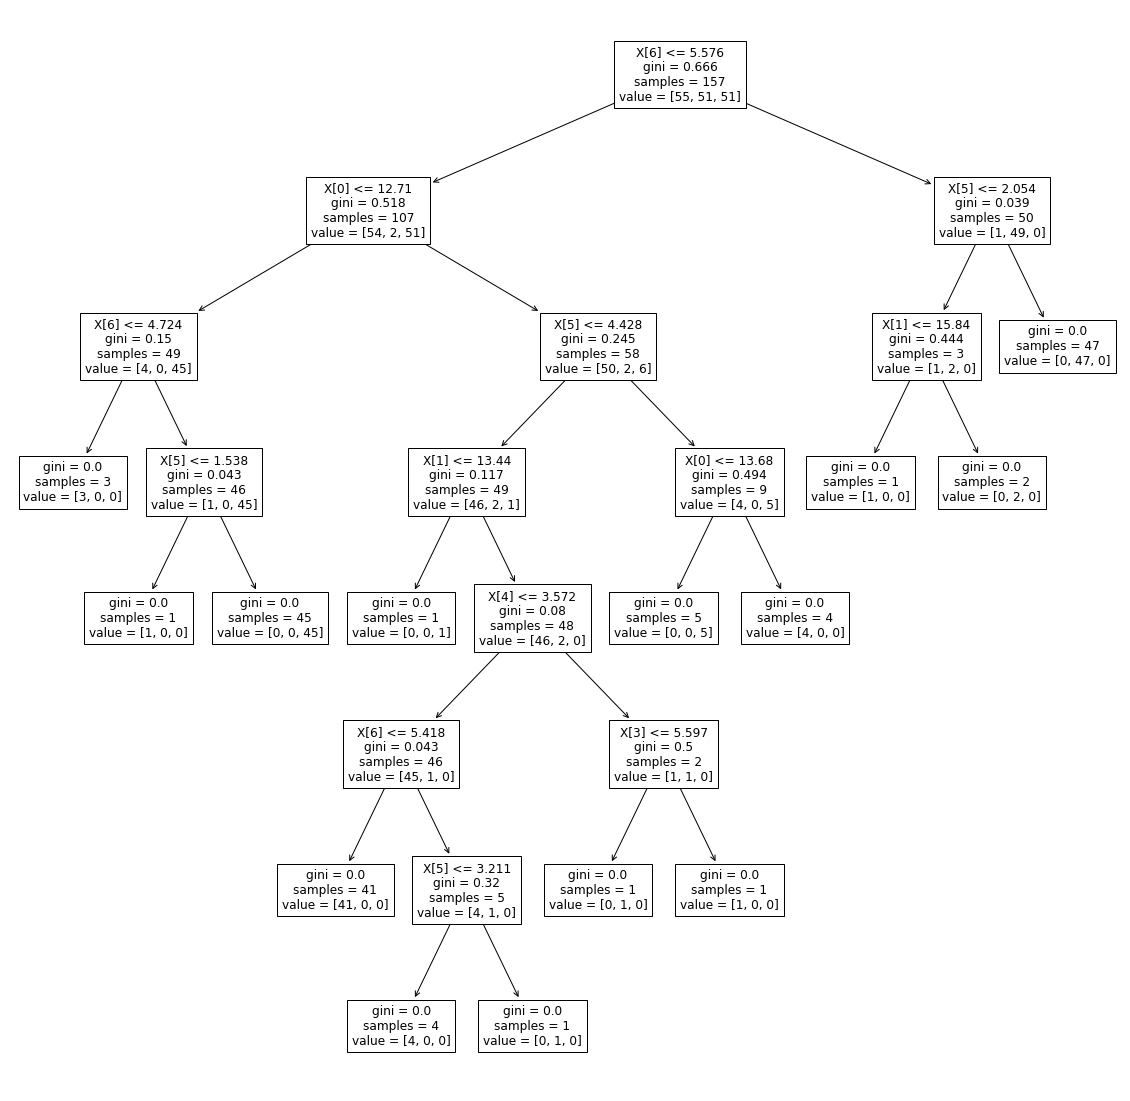

In [82]:
# Display the Confusion matrix
print(confusion_matrix(max_y_test, max_predictions))

# See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(max_y_test, max_predictions))
plt.figure(figsize = (20,20))

tree.plot_tree(max_model)
plt.show()

Original data

Train = 50%

Test = 50%

In [96]:
task(x_data = x, y_data = y, test_value = 0.5, train_value = 0.5)
print(f'First 5 accuracies: {accuracy[:5]}')
print(f'First 5 confusion matrices: {confusion[:5]}')

Mean of 100 tests: 0.8934285714285706
First 5 accuracies: [0.9622641509433962, 0.8867924528301887, 0.8867924528301887, 0.9245283018867925, 0.9056603773584906]
First 5 confusion matrices: [array([[15,  0,  0],
       [ 1, 17,  0],
       [ 1,  0, 19]], dtype=int64), array([[13,  0,  2],
       [ 1, 17,  0],
       [ 3,  0, 17]], dtype=int64), array([[15,  0,  1],
       [ 4, 17,  0],
       [ 1,  0, 15]], dtype=int64), array([[17,  1,  2],
       [ 0, 17,  0],
       [ 1,  0, 15]], dtype=int64), array([[13,  3,  0],
       [ 1, 18,  0],
       [ 1,  0, 17]], dtype=int64)]


In [98]:
max_value = max(accuracy)

max_index = accuracy.index(max_value)
max_y_test = y_test_list[max_index]
max_predictions = predictions_list[max_index]
max_model = model_list[max_index]
print(f'Max accuracy: {max_value}')

Max accuracy: 1.0


[[15  0  0]
 [ 0 19  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        19

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



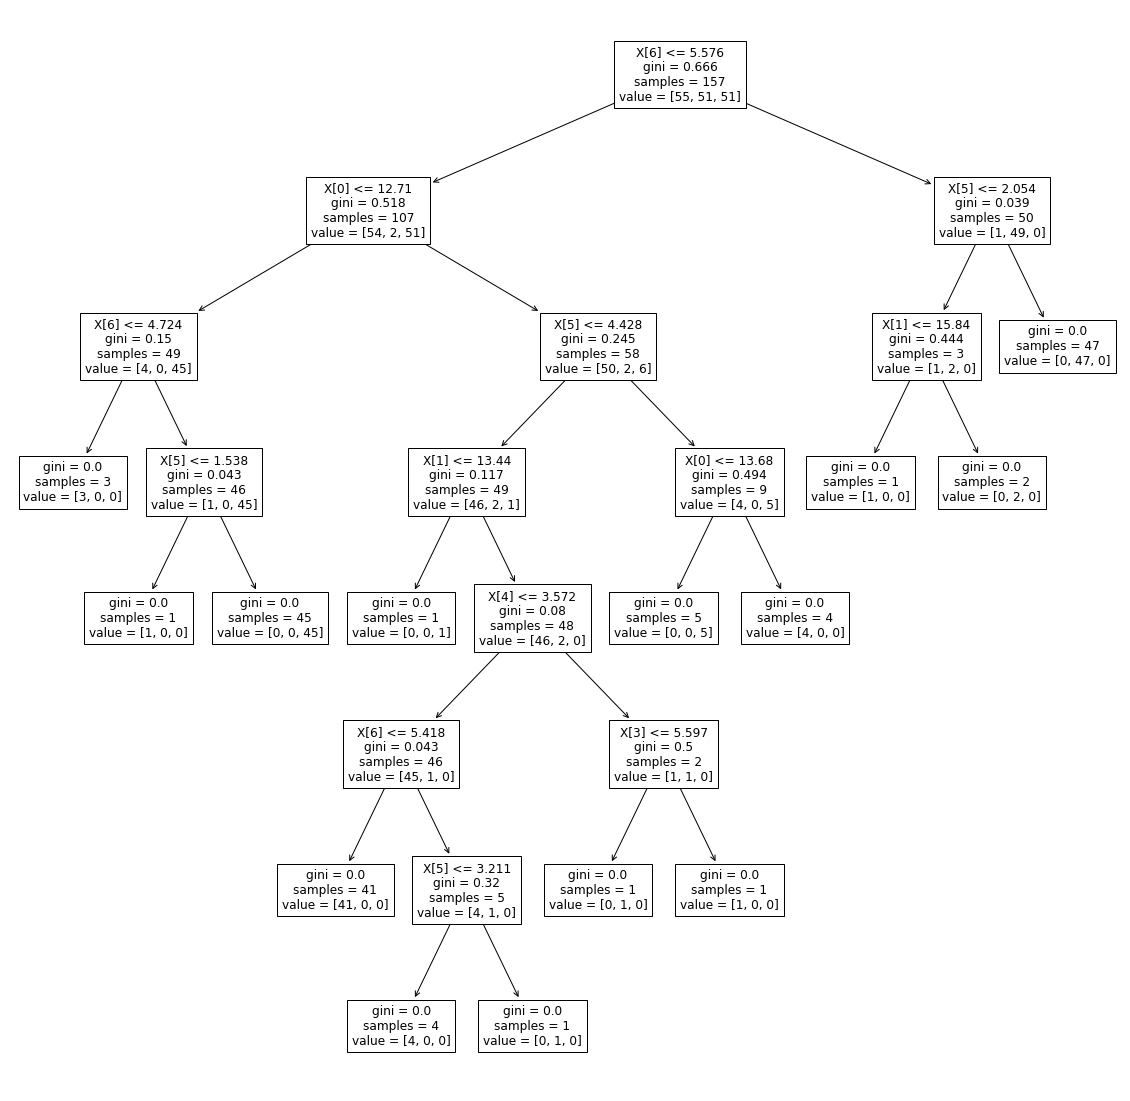

In [100]:
# Display the Confusion matrix
print(confusion_matrix(max_y_test, max_predictions))

# See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(max_y_test, max_predictions))
plt.figure(figsize = (20,20))

tree.plot_tree(max_model)
plt.show()

Normalized data

Train = 75%

Test = 25%

In [86]:
#Normalize data.
x_norm = normalize(x)
x_norm = pd.DataFrame(x_norm, columns=('area', 'perimeter', 'compactness','length_kernel','width_kernel', 'asymmetry_coefficient','length_kernel_groove'))
x_norm

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove
0,0.662718,0.644478,0.037826,0.250278,0.143835,0.096455,0.226696
1,0.664107,0.650272,0.039324,0.247880,0.148755,0.045434,0.221191
2,0.656884,0.647690,0.041601,0.243217,0.153395,0.124068,0.221796
3,0.649097,0.653787,0.041999,0.249696,0.158475,0.105947,0.225355
4,0.682446,0.633821,0.038198,0.239237,0.150612,0.057293,0.218814
...,...,...,...,...,...,...,...
205,0.612738,0.663506,0.044148,0.258214,0.149842,0.182514,0.244794
206,0.583269,0.668968,0.044205,0.266964,0.145168,0.224634,0.259848
207,0.593783,0.614475,0.039959,0.235534,0.145387,0.374038,0.227437
208,0.600600,0.670095,0.043224,0.262509,0.143860,0.182513,0.255864


In [87]:
task(x_data = x_norm, y_data = y, test_value = 0.25, train_value = 0.75)
print(f'First 5 accuracies: {accuracy[:5]}')
print(f'First 5 confusion matrices: {confusion[:5]}')

Mean of 100 tests: 0.9079245283018865
First 5 accuracies: [0.9622641509433962, 0.8867924528301887, 0.8867924528301887, 0.9245283018867925, 0.9056603773584906]
First 5 confusion matrices: [array([[15,  0,  0],
       [ 1, 17,  0],
       [ 1,  0, 19]], dtype=int64), array([[13,  0,  2],
       [ 1, 17,  0],
       [ 3,  0, 17]], dtype=int64), array([[15,  0,  1],
       [ 4, 17,  0],
       [ 1,  0, 15]], dtype=int64), array([[17,  1,  2],
       [ 0, 17,  0],
       [ 1,  0, 15]], dtype=int64), array([[13,  3,  0],
       [ 1, 18,  0],
       [ 1,  0, 17]], dtype=int64)]


In [88]:
max_value = max(accuracy)

max_index = accuracy.index(max_value)
max_y_test = y_test_list[max_index]
max_predictions = predictions_list[max_index]
max_model = model_list[max_index]
print(f'Max accuracy: {max_value}')

Max accuracy: 1.0


[[15  0  0]
 [ 0 19  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        19

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



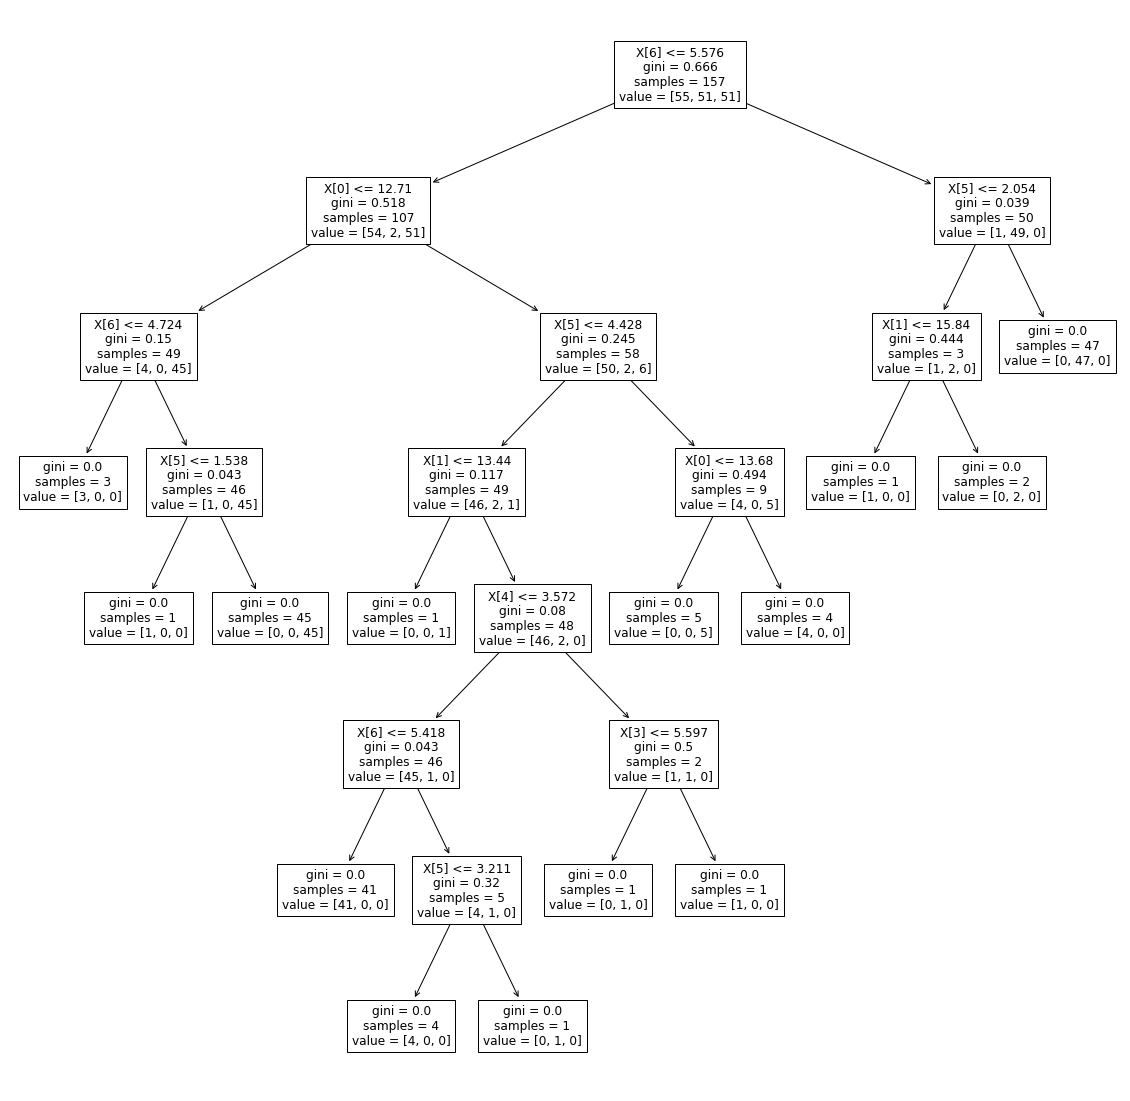

In [89]:
# Display the Confusion matrix
print(confusion_matrix(max_y_test, max_predictions))

# See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(max_y_test, max_predictions))
plt.figure(figsize = (20,20))

tree.plot_tree(max_model)
plt.show()

Normalized data

Train = 50%

Test = 50%

In [102]:
task(x_data = x_norm, y_data = y, test_value = 0.5, train_value = 0.5)
print(f'First 5 accuracies: {accuracy[:5]}')
print(f'First 5 confusion matrices: {confusion[:5]}')

Mean of 100 tests: 0.8917142857142848
First 5 accuracies: [0.9622641509433962, 0.8867924528301887, 0.8867924528301887, 0.9245283018867925, 0.9056603773584906]
First 5 confusion matrices: [array([[15,  0,  0],
       [ 1, 17,  0],
       [ 1,  0, 19]], dtype=int64), array([[13,  0,  2],
       [ 1, 17,  0],
       [ 3,  0, 17]], dtype=int64), array([[15,  0,  1],
       [ 4, 17,  0],
       [ 1,  0, 15]], dtype=int64), array([[17,  1,  2],
       [ 0, 17,  0],
       [ 1,  0, 15]], dtype=int64), array([[13,  3,  0],
       [ 1, 18,  0],
       [ 1,  0, 17]], dtype=int64)]


In [103]:
max_value = max(accuracy)

max_index = accuracy.index(max_value)
max_y_test = y_test_list[max_index]
max_predictions = predictions_list[max_index]
max_model = model_list[max_index]
print(f'Max accuracy: {max_value}')

Max accuracy: 1.0


[[15  0  0]
 [ 0 19  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        19

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



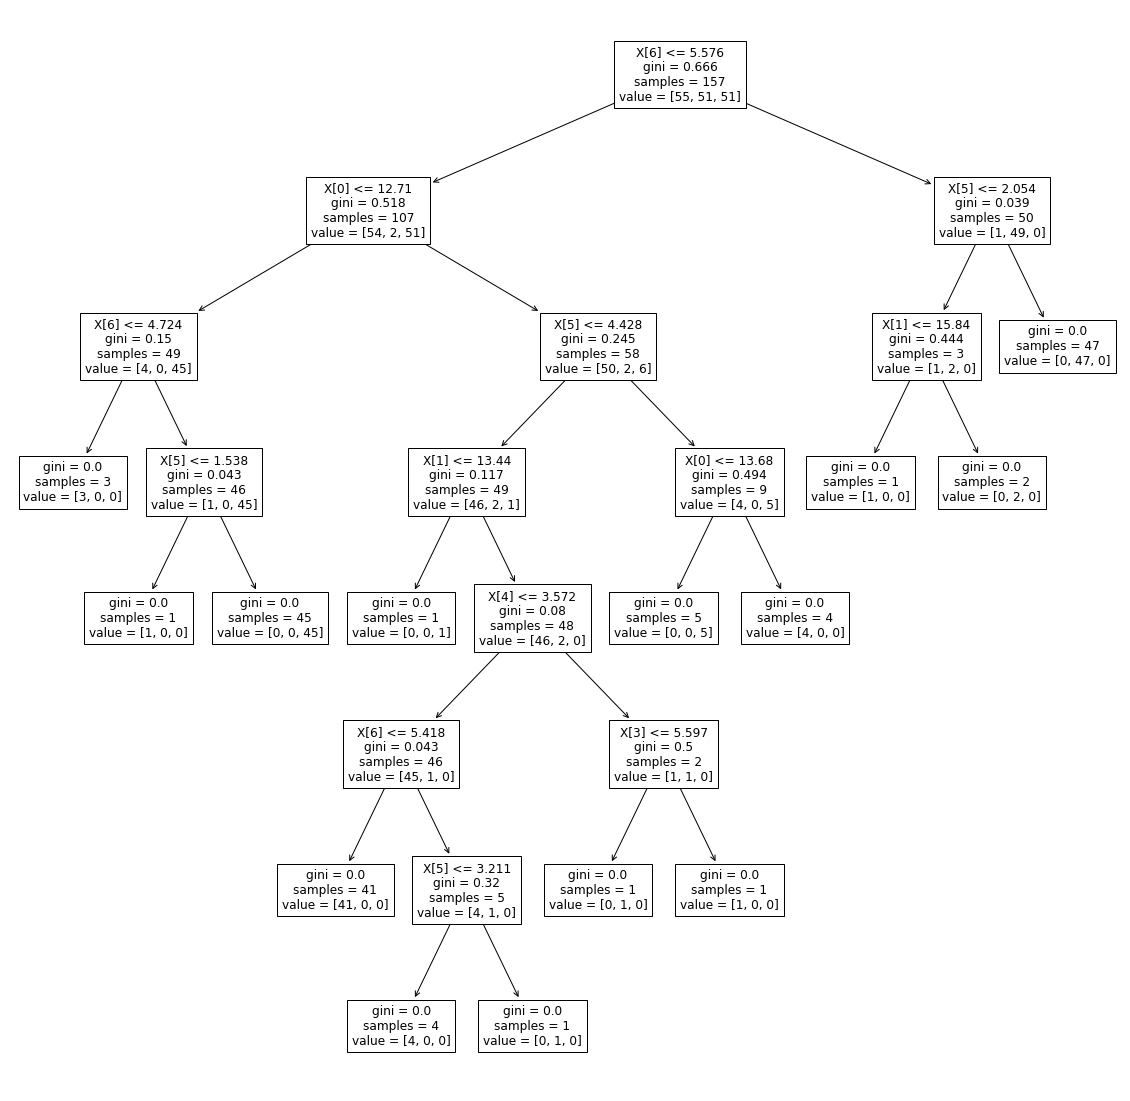

In [104]:
# Display the Confusion matrix
print(confusion_matrix(max_y_test, max_predictions))

# See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(max_y_test, max_predictions))
plt.figure(figsize = (20,20))

tree.plot_tree(max_model)
plt.show()